<a href="https://colab.research.google.com/github/a-afonso/03MAIR-Algoritmos-de-optimizacion/blob/master/SEMINARIO/SEMINARIO_Augusto_Afonso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Seminario<br>
<b>Nombre y Apellidos: </b>Augusto Afonso Losada <br>
<b>Url: </b>https://github.com/a-afonso/03MAIR-Algoritmos-de-optimizacion/tree/master/SEMINARIO<br>
  <b>Problema:</b>
> 1. Elección de grupos de población homogéneos <br>

<b>Descripción del problema: </b>Una productora ganadera nos encarga la tarea de seleccionar grupos de terneros para aplicar 3 tratamientos diferentes. Para cada uno de los tratamientos debemos seleccionar 3 grupos de terneros que sean lo mas homogéneos posible en peso para que en los resultados del tratamiento influya lo menos posible el peso del animal. Disponemos de una población de N animales entre machos y hembras.<br>
<br>
Se solicita diseñar un algoritmo para conseguir una agrupación que cumpla de la mejor manera posible las especificaciones de la productora.<br>
<br>

(*) La respuesta es obligatoria





                                        

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?





**Respuesta**<br>

Para calcular las posibilidades sin restricciones, debemos suponer que son N animales, independientemente del sexo. La solución se obtendría realizando todas las combinaciones posibles, evaluando cada una de ellas y quedándonos con la mejor.<br>

En estas circunstancias, serían 3 tratamientos x 3 grupos = 9 grupos efectivos por lo cual, lo que tenemos, son combinaciones de N elementos tomados de 9 en 9 y sin repetición, es decir:<br>

*   N! / (9! (N-9)!)

<br>
En el caso con restricciones, aunque podría parecer que la solución puede ser única (la que proponga la combinación más homogénea), en realidad no es posible determinar con exactitud el número de posibles soluciones, ya que por ejemplo, puede haber animales del mismo sexo con el mismo peso, en cuyo caso podrían caer en cualquiera de los grupos efectivos del propio sexo indistintamente.<br>

La peor de las situaciones, sería aquella en la que todos los animales tienen el mismo peso y el sexo está divido exactamente al 50%, porque cualquier combinación en cada sexo sería posible, con lo cual las posibilidades vendrían a ser:<br>

*   (N/2)! / (9! ((N/2)-9)!)

Paradójicamente, en este último caso cualquier combinación sería la solución óptima, ya que cumpliría con el criterio solicitado.<br>

Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Arguméntalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo).


**Respuesta**

Podemos utilizar un dataset para contener la estructura de datos de entrada. El dataset contendría N filas y tres columnas. Las columnas serían: el identificador del animal, el peso y el sexo ("Id", "Peso" y "Sexo").<br>

La estructura de datos devuelta sería una lista de 2 elementos, una por cada sexo. Cada uno de estos elementos sería a su vez una lista de 9 elementos, tantos como grupos efectivos de cada sexo. A su vez, cada uno de estos elementos sería una lista cuyos elementos serían las "fichas" (Id, Peso, etc.) de los animales de cada uno de los grupos efectivos.

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

**Respuesta**

Para responder a estas preguntas, habría que definir el concepto de *"Homogeneidad de un Grupo Efectivo de animales"*.<br>

*   Homogeneidad de un Grupo Efectivo de animales (HGE): Peso medio de los animales que componen un grupo efectivo de animales. Donde un grupo efectivo de animales (GE) equivale al conjunto de animales en cada uno de los conjuntos formados por el cómputo de 3 tratamientos x 3 grupos. Es decir hay 9 grupos efectivos (por cada sexo) con sus animales.

Para un determinado GE, habría que calcular su HGE, comparándola con lo desviada que está respecto al peso medio de toda la muestra. La combinación óptima será aquella en la que dicha desviación de todos los GE con respecto al peso medio, es mínima.<br>

Por lo tanto es un problema de minimización. 



Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [7]:
import numpy as np
import pandas as pd
import random
import math
import sys
import matplotlib.pyplot as plt
from itertools import permutations


# Inicialización de variables globales
#   - Escogemos solo una población de 18 animales y 3 grupos por sexo (1x3) 
#     para las pruebas porque la explosión combinatoria hace que el tiempo
#     de ejecución sea excesivo a partir de estos valores
#   - Incluso en este caso, si el número de animales queda dividido por sexo
#     al 50% (9+9), el tiempo se hace inviable
nIndividuals = 18
nTreats = 1 
nGroups = 3
infinito = sys.maxsize


# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
MUESTRA["Id"] = [i for i in range(nIndividuals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nIndividuals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nIndividuals)]


# Función que resuelve el problema 1 del seminario
def do_problem1(MUESTRA, nTreats, nGroups):
  
  # Calcula el número total de animales de la muestra
  nAnimals = len(MUESTRA)                                                       #Coste = nAnimals

  
  # Dividimos el dataset de la muestra en dos listas, una para cada sexo
  MALE = []                                                                     #Coste = 2 
  FEMALE = []

  for index, row in MUESTRA.iterrows():                                         #Coste = nAnimals * 5
    if row["Sexo"] == 0:
      MALE.append([int(row["Id"]), row["Peso"], 0])
    else:
      FEMALE.append([int(row["Id"]), row["Peso"], 0])

      
  # Calcula el número máximo de animales por grupo
  nMale = len(MALE)                                                             #Coste = nAnimals
  nFemale = len(FEMALE)

  nAnimalsGroup = min(nMale, nFemale) // (nTreats * nGroups)                    #Coste = 5

  
  # Función local que calcula la homogeneidad de los pesos de una 
  # permutación
  def get_homogeneidad(PERMUTACION, PESOS, p_medio, nTotalGroups, nAnimalsGroup):
    TEMP_1 = []
    ix = 0
    suma = 0
    for g in range(nTotalGroups):
      TEMP_2 = []
      TEMP_3 = []
      for i in range(ix, ix+nAnimalsGroup):
        TEMP_2.append(PESOS[i])
        TEMP_3.append(PERMUTACION[i])
      TEMP_1.append(TEMP_3)
      ix = ix + nAnimalsGroup

      media = np.mean(TEMP_2)
      suma = suma + abs(p_medio - media)

    return(suma / nTotalGroups, TEMP_1)

  
  # Función local para crear agrupaciones de cualquier sexo
  def group_animals(MSEXO, nTreats, nGroups, nAnimalsGroup):

    # Calcula el peso medio
    p_medio = np.mean(MSEXO, axis=0)[1]                                         #Coste = nAnimalsSex + 1
    
    # Calcula el número total de grupos
    nTotalGroups = nTreats * nGroups                                            #Coste = 2

    # Calcula el número de animales de la lista
    nAnimalsSex = nTotalGroups * nAnimalsGroup                                  #Coste = 2

    # Ordenamos la muestra por diferencias con respecto a la media
    # para excluir los más distantes en peso (de la media)
    for a in MSEXO:                                                             #Coste = nAnimalsSex * 3 
      a[2] = abs(p_medio - a[1])
    MSEXO = sorted(MSEXO, key=lambda x: x[2])                                   #Coste = nAnimalsSex * log(nAnimalsSex)
    MSEXO = MSEXO[0:nAnimalsSex]                                                #Coste = nAnimalsSex

    # Calcula el nuevo peso medio
    p_medio = np.mean(MSEXO, axis=0)[1]                                         #Coste = nAnimalsSex + 1

    # Calcula las permutaciones de animales y crea una lista equivalente
    # a ellas con sus pesos correspondientes
    PERMUTACIONES = list(permutations([MSEXO[i][0] for i in range(0, len(MSEXO))]))

    PESOS = []
    for PERM in PERMUTACIONES:
      P = []
      for p in PERM:
        P.append(MUESTRA.loc[MUESTRA["Id"] == p, "Peso"].iloc[0])
      PESOS.append(P)

    # Calcula la permutación más homogénea
    best_permutacion = []
    best_homogeneidad = infinito
    for ix in range(len(PERMUTACIONES)):
      h, g = get_homogeneidad(PERMUTACIONES[ix], PESOS[ix], p_medio, nTotalGroups, nAnimalsGroup)
      if h < best_homogeneidad:
        best_permutacion = g
        best_homogeneidad = h

    return best_permutacion, best_homogeneidad
  
  # Consigue las agrupaciones de animales macho más homogéneas
  RMALE, hM = group_animals(MALE, nTreats, nGroups, nAnimalsGroup)

  # Consigue las agrupaciones de animales hembra más homogéneas
  RFEMALE, hF = group_animals(FEMALE, nTreats, nGroups, nAnimalsGroup)
  
  return RMALE, RFEMALE


# Calcula e imprime los grupos para una muestra dada
agrupaciones = do_problem1(MUESTRA, nTreats, nGroups)

print('Grupos de sexo Macho: ', agrupaciones[0])
print()
print('Grupos de sexo Hembra: ', agrupaciones[1])


Grupos de sexo Macho:  [[15, 3], [9, 12], [7, 11]]

Grupos de sexo Hembra:  [[2, 1], [0, 6], [16, 14]]


Calcula la complejidad del algoritmo por fuerza bruta

**Respuesta**

Debido al hecho de que en el algoritmo por fuerza bruta, necesariamente evaluaremos todas las permutaciones, el coste será O(n!), es decir, de complejidad factorial.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

**Respuesta**

El siguiente algoritmo, en mi opinión, mejora el de fuerza bruta por las razones siguientes:

No se construye un conjunto con todas las permutaciones posibles. Si nos fijamos un poco, una simple ordenación de la muestra por peso de menor a mayor, hace que los pesos estén muy próximos entre sí. Si, una vez ordenada la muestra por pesos, agrupamos los individuos, escogiendo uno por cada X, obtenemos una media por grupo muy homogénea.

Esto puede verse más abajo, en el gráfico mostrado a continuación del código del algoritmo siguiente.

In [0]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from itertools import permutations
import matplotlib.pyplot as plt


# Función que imprime un gráfico con varias series
def print_graph(SERIES, TSERIES, TEJES, COLORES):
  fig, axes = plt.subplots(1, 1)
  
  for i in range(len(SERIES)):
    axes.plot(np.arange(len(SERIES[i])), SERIES[i], COLORES[i])
    
  plt.legend(TSERIES, loc='best') 
  axes.set_xlabel(TEJES[0])
  axes.set_ylabel(TEJES[1])
  
  plt.show()
  

# Inicialización de variables globales
nIndividuals = 500
nTreats = 3 
nGroups = 3


# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
#random.seed(30000)
MUESTRA["Id"] = [i for i in range(nIndividuals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nIndividuals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nIndividuals)]


# Función mejorada que resuelve el problema 1 del seminario
def do_problem1(MUESTRA, nTreats, nGroups, options):
  
  # Calcula el número total de animales de la muestra
  nAnimals = len(MUESTRA)                                                       #Coste = nAnimals
  
  
  # Dividimos el dataset de la muestra en dos listas, una para cada sexo
  MALE = []                                                                     #Coste = 2 
  FEMALE = []

  for index, row in MUESTRA.iterrows():                                         #Coste = nAnimals * 5
    if row["Sexo"] == 0:                                                        
      MALE.append([int(row["Id"]), row["Peso"], 0])
    else:
      FEMALE.append([int(row["Id"]), row["Peso"], 0])

      
  # Calcula el número máximo de animales por grupo
  nMale = len(MALE)                                                             #Coste = nAnimals
  nFemale = len(FEMALE)

  nAnimalsGroup = min(nMale, nFemale) // (nTreats * nGroups)                    #Coste = 5 

  
  # Función local para crear agrupaciones de cualquier sexo
  def group_animals(MSEXO, nTreats, nGroups, nAnimalsGroup, options):

    # Calcula el peso medio
    p_medio = np.mean(MSEXO, axis=0)[1]                                         #Coste = nAnimalsSex + 1
    
    # Calcula el número total de grupos
    nTotalGroups = nTreats * nGroups                                            #Coste = 2

    # Calcula el número de animales de la lista
    nAnimalsSex = nTotalGroups * nAnimalsGroup                                  #Coste = 2

    # Ordenamos la muestra por diferencias con respecto a la media
    # para excluir los más distantes en peso (de la media)
    if options == "Ordenada":                                                   #Coste = 1                                                   
      for a in MSEXO:                                                           #Coste = nAnimalsSex * 3 
        a[2] = abs(p_medio - a[1])
      MSEXO = sorted(MSEXO, key=lambda x: x[2])                                 #Coste = nAnimalsSex * log(nAnimalsSex)
      MSEXO = MSEXO[0:nAnimalsSex]                                              #Coste = nAnimalsSex

      # Reordenamos la muestra por pesos
      MSEXO = sorted(MSEXO, key=lambda x: x[1])                                 #Coste = nAnimalsSex * log(nAnimalsSex)

      # Crea los grupos más homogéneos posible, escogiendo un individuo por cada
      # nTotalGroups, de forma que en cada grupo entren individuos  
      # significativos de cada zona de la lista ya ordenada por pesos
      TEMP_1 = []                                                               #Coste = 1
      for i in range(nTotalGroups):                                             #Coste = nTotalGroups * 2
        TEMP_2 = []

        for j in range(i, nAnimalsSex, nTotalGroups):                           #Coste = nAnimalsSex/nTotalGroups
          TEMP_2.append([MSEXO[j][0], MSEXO[j][1]])

        TEMP_1.append(TEMP_2)
    # Si se solicita la agrupación sin ordenación, devuelve los grupos tal y
    # como están etiquetados los animales (esta opción solo es útil para
    # comprobar gráficamente la diferencia entre los modos de ordenación 
    # y sin ella, no computa para el coste)
    else:
      MSEXO = MSEXO[0:nAnimalsSex]
      
      TEMP_1 = []
      TEMP_2 = []
      i = 0
      while i < nAnimalsSex:
        if i % nAnimalsGroup == 0:
          TEMP_2 = []
          
        TEMP_2.append([MSEXO[i][0], MSEXO[i][1]])
          
        if i % nAnimalsGroup == 0:
          TEMP_1.append(TEMP_2)
          
        i = i + 1;
        
    return TEMP_1
  
  # Consigue las agrupaciones de animales macho más homogéneas
  RMALE = group_animals(MALE, nTreats, nGroups, nAnimalsGroup, options)         #Coste = 1
  
  # Consigue las agrupaciones de animales hembra más homogéneas
  RFEMALE = group_animals(FEMALE, nTreats, nGroups, nAnimalsGroup, options)     #Coste = 1 
  
  return RMALE, RFEMALE                                                         #Coste = 1





Tal y como se indica en el párrafo anterior, en el gráfico generado por el siguiente código, se muestra un ejemplo de como se comportaría el mismo algoritmo (con y sin ordenación) con la misma muestra.

Comparativa entre grupos con pesos previamente ordenados y no ordenados:


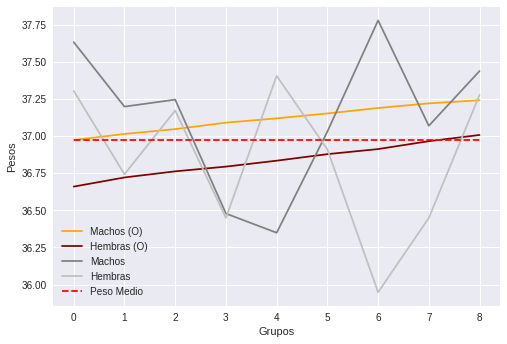

In [2]:
# Calcula e imprime los grupos para una muestra dada
agrupaciones = do_problem1(MUESTRA, nTreats, nGroups, 'Ordenada')

#print('Grupos de sexo Macho: ')
LPM = []
for i in agrupaciones[0]:
  p_medio = np.mean(i, axis=0)[1]
  LPM.append(p_medio)
  #print(i)
#print(LPM)
#print()

#print('Grupos de sexo Hembra: ')
LPF = []
for i in agrupaciones[1]:
  p_medio = np.mean(i, axis=0)[1]
  LPF.append(p_medio)
  #print(i)
#print(LPF)
#print()


# Calcula e imprime los grupos sin ordenar
agrupaciones = do_problem1(MUESTRA, nTreats, nGroups, '')

#print('Grupos de sexo Macho: ')
LPMU = []
for i in agrupaciones[0]:
  p_medio = np.mean(i, axis=0)[1]
  LPMU.append(p_medio)
  #print(i)
#print(LPMU)
#print()

#print('Grupos de sexo Hembra: ')
LPFU = []
for i in agrupaciones[1]:
  p_medio = np.mean(i, axis=0)[1]
  LPFU.append(p_medio)
  #print(i)
#print(LPFU)
#print()


# Imprime un gráfico comparativo
print('Comparativa entre grupos con pesos previamente ordenados y no ordenados:')

SERIES = []
SERIES.append(LPM)
SERIES.append(LPF)
SERIES.append(LPMU)
SERIES.append(LPFU)
m = (np.mean(LPM) + np.mean(LPF)) / 2
SERIES.append([m for _ in range(nTreats * nGroups)])

TITULOS = ['Machos (O)', 'Hembras (O)', 'Machos', 'Hembras', 'Peso Medio']

COLORES = ['orange', 'maroon', 'gray', 'silver', 'r--']
              
print_graph(SERIES, TITULOS, ['Grupos', 'Pesos'], COLORES)

(*)Calcula la complejidad del algoritmo 

**Respuesta**

El cálculo del coste detallado está documentado en el propio algoritmo, indicado como comentario en cada línea a partir de la posición 80.

Se puede observar que la complejidad es del orden de O(n log(n)), siendo n = número de animales de la muestra, debido a la necesidad de ordenar varias veces las listas.

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

**Respuesta**

El juego de datos siguiente se construye para 500 animales.

In [0]:
import pandas as pd
import random

# Inicialización de variables globales
nAnimals = 500

# Creación de un dataset de muestra
MUESTRA = pd.DataFrame()
MUESTRA["Id"] = [i for i in range(nAnimals)]
MUESTRA["Peso"] = [random.gauss(37, 2.1) for i in range(nAnimals)]
MUESTRA["Sexo"] = [random.getrandbits(1) for i in range(nAnimals)]

Aplica el algoritmo al juego de datos generado

**Respuesta**

In [4]:
# Calcula e imprime los grupos para una muestra dada y 3 x 3 grupos
agrupaciones = do_problem1(MUESTRA, 3, 3, 'Ordenada')

print('Grupos de sexo Macho: ')
for i in agrupaciones[0]:
  print(i)
print()

print('Grupos de sexo Hembra: ')
for i in agrupaciones[1]:
  print(i)
print()


Grupos de sexo Macho: 
[[418, 33.758768934188744], [290, 34.38539142732347], [420, 34.716611909124495], [457, 34.89135572568759], [293, 35.20986214633553], [12, 35.46121075481902], [395, 35.54318086210656], [389, 35.681472714639064], [499, 35.887174595681685], [207, 36.341555507462026], [496, 36.56003756866133], [107, 36.70033902325298], [229, 36.85181934896259], [284, 37.02923698487431], [110, 37.15173611147528], [473, 37.32388851027784], [185, 37.45062850289502], [369, 37.66360348433557], [26, 37.96356518535343], [325, 38.18566394968566], [78, 38.361909967323285], [28, 38.60413779269864], [442, 38.97674425070662], [47, 39.20781710032082], [244, 39.72863073763839], [335, 39.98117664453132]]
[[6, 33.80057504825918], [113, 34.458259844925784], [124, 34.73019556697094], [353, 34.900381227381786], [187, 35.238210398351015], [220, 35.47072420506652], [431, 35.589667997152304], [312, 35.684111423120186], [339, 35.92528888070002], [221, 36.41711822550088], [413, 36.6486327479738], [287, 36.7

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

**Respuesta**

Las fuentes principales utilizadas provienen de Internet: 

Página Web de Python: https://www.python.org/<br>
Página Web de Matplotlib: https://matplotlib.org/index.html<br>
Página Web de StackOverflow: https://stackoverflow.com/<br>
Página Web de Wikipedia: https://es.wikipedia.org/wiki/Wikipedia:Portada<br>



Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta